In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
#dataset preparation:
samples = 1000
nsamples = np.random.multivariate_normal(mean=[0,3],cov=[[1,0.5],[0.5,1]], size=samples)

psamples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=samples)

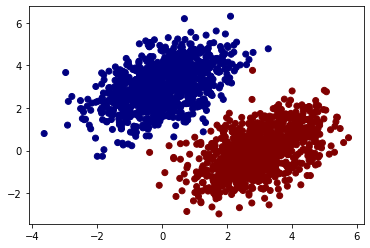

In [3]:
inputs = np.vstack((nsamples, psamples)).astype(np.float32)
labels = np.vstack((np.zeros((samples, 1), dtype='float32'), np.ones((samples, 1 ),dtype='float32')))
plt.scatter(inputs[:,0], inputs[:,1], c=labels[:,0], cmap='jet')
plt.show()

In [4]:
input_dim = 2
output_dim = 1

#initalize weights and bias
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def predict(inputs):
  return tf.matmul(inputs,w) + b

def cal_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels-predictions))

def training(x, y):
  learning_rate = 1e-1
  with tf.GradientTape() as tape:
    predictions = predict(x)
    loss = cal_loss(y, predictions)
  grad_w , grad_b = tape.gradient(loss, [w,b])
  w.assign_sub(grad_w * learning_rate)
  b.assign_sub(grad_b * learning_rate)
  return loss


Loss at epoch 0: 0.5980
Loss at epoch 1: 0.1686
Loss at epoch 2: 0.1058
Loss at epoch 3: 0.0922
Loss at epoch 4: 0.0856
Loss at epoch 5: 0.0804
Loss at epoch 6: 0.0757
Loss at epoch 7: 0.0714
Loss at epoch 8: 0.0674
Loss at epoch 9: 0.0638
Loss at epoch 10: 0.0605
Loss at epoch 11: 0.0575
Loss at epoch 12: 0.0547
Loss at epoch 13: 0.0522
Loss at epoch 14: 0.0499
Loss at epoch 15: 0.0478
Loss at epoch 16: 0.0459
Loss at epoch 17: 0.0441
Loss at epoch 18: 0.0425
Loss at epoch 19: 0.0410


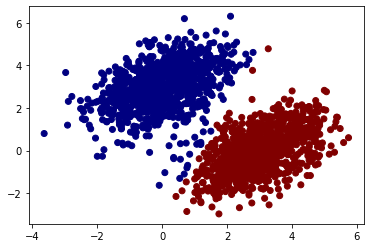

In [5]:
# Train the model:
for epoch in range(20):
  loss = training(inputs, labels)
  print("Loss at epoch %d: %.4f" %(epoch, loss))

predictions = predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:,0] > 0.5, cmap='jet')
plt.show()